In [3]:
import pandas as pd
import numpy as np
from scipy import stats
# Load sentiment data from CSV file
# Replace 'path_to_your_data.csv' with the path to your CSV file
# Replace 'sentiment_column' with the name of the column containing sentiment 
#scores
df = pd.read_csv(r"C:\Desktop\FDS_Batch_13\Dataset\sentiment_analysis_output.csv")
sentiment_scores = df['sentiment'].values 
# Replace 'sentiment_column' with your actual column name
# Define your benchmark value
benchmark_value = 0.0 # Example benchmark, use this
# Perform the one-sample t-test
mean_score = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores, ddof=1) # Sample standard deviation
n = len(sentiment_scores)


Shapiro-Wilk Test Statistic: 0.6927, P-Value: 0.0000
Data is not normally distributed (Reject H0).


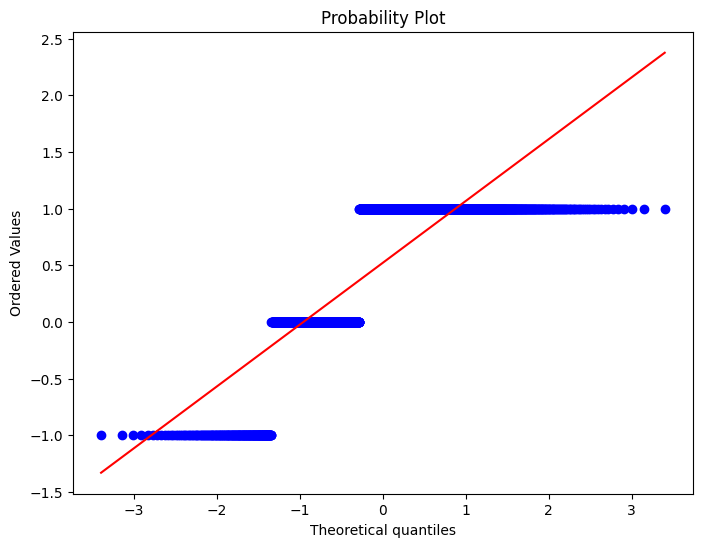

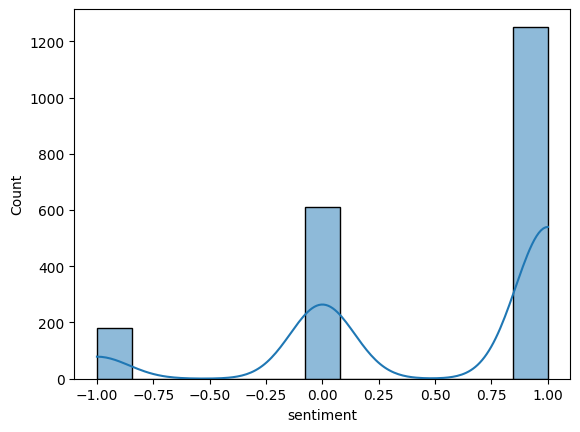

In [5]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Assuming you have your sentiment scores in a Pandas DataFrame
sentiment_scores = df['sentiment']
# Shapiro-Wilk Test
stat, p_value = shapiro(sentiment_scores)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")
# Interpret the p-value
if p_value > 0.05:
 print("Data is normally distributed (Fail to reject H0).")
else:
 print("Data is not normally distributed (Reject H0).")
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(sentiment_scores, dist="norm", plot=plt)
plt.show()
# Histogram
sns.histplot(sentiment_scores, kde=True)
plt.show()


In [7]:
from scipy.stats import levene
# Assuming you have sentiment scores grouped by database
grouped_sentiments = [group['sentiment'] for name, group in df.groupby('Media')]
# Levene's Test for equal variances
stat, p_value = levene(*grouped_sentiments)
print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")
# Interpret the p-value
if p_value > 0.05:
 print("Variances are equal (Fail to reject H0).")
else:
 print("Variances are not equal (Reject H0).")


Levene's Test Statistic: 5.2987, P-Value: 0.0003
Variances are not equal (Reject H0).


In [10]:
from scipy.stats import f_oneway, kruskal, shapiro

# Check if data is normally distributed and variances are equal
if p_value > 0.05 and shapiro(sentiment_scores)[1] > 0.05:
    f_statistic, anova_p_value = f_oneway(*grouped_sentiments)
    print(f"ANOVA F-Statistic: {f_statistic:.4f}, P-Value: {anova_p_value:.4f}")
    
    if anova_p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between the groups.")
else:
    # If data is not normally distributed or variances are not equal, perform Kruskal-Wallis H Test
    h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)
    print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value: {kruskal_p_value:.4f}")
    
    if kruskal_p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between the groups.")



Kruskal-Wallis H Statistic: 17.9836, P-Value: 0.0012
Reject the null hypothesis: There is a significant difference between the groups.


Pearson Correlation between Sentiment and Comment Length: 0.0988, P-Value: 0.0000
Spearman Correlation between Sentiment and Comment Length: 0.0818, P-Value: 0.0002


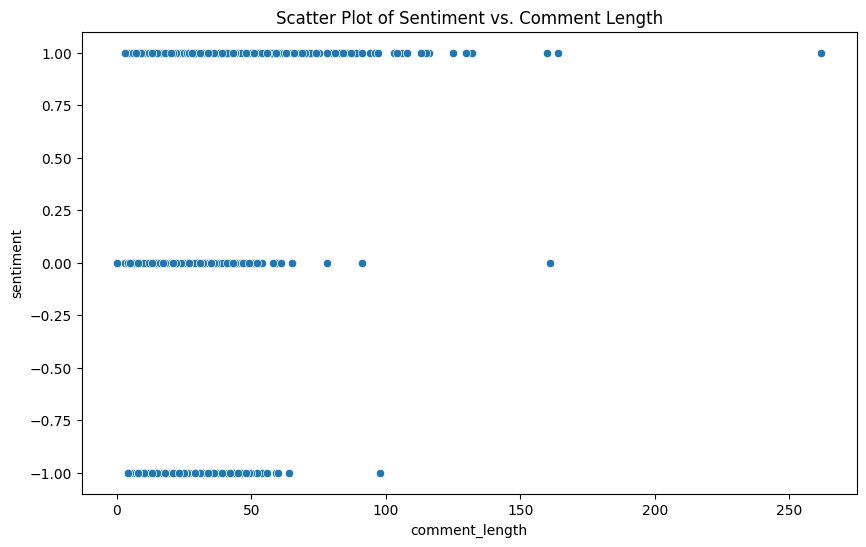

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load your data
df = pd.read_csv(r"C:\Users\User\Downloads\sentiment_analysis_output.csv")

# Handle missing or non-string values in the 'Comments' column by replacing NaNs with an empty string
df['comment_length'] = df['Comments'].fillna("").apply(len)

# Checking correlations between sentiment and comment length
pearson_corr, pearson_p_value = pearsonr(df['sentiment'], df['comment_length'])
spearman_corr, spearman_p_value = spearmanr(df['sentiment'], df['comment_length'])

# Output correlation results
print(f"Pearson Correlation between Sentiment and Comment Length: {pearson_corr:.4f}, P-Value: {pearson_p_value:.4f}")
print(f"Spearman Correlation between Sentiment and Comment Length: {spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")

# Visualizing the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='sentiment', data=df)
plt.title('Scatter Plot of Sentiment vs. Comment Length')
plt.show()





In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Load the CSV file
df = pd.read_csv(r"C:\Users\User\Downloads\sentiment_analysis_output.csv")

# Handle missing or non-string values in the 'Comments' column by replacing NaNs with an empty string
df['comment_length'] = df['Comments'].fillna("").apply(len)

# Drop rows where 'sentiment' is NaN or contains invalid data
df = df.dropna(subset=['sentiment'])

# Ensure 'sentiment' is numeric
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Drop rows with invalid (non-numeric) 'sentiment' values
df = df.dropna(subset=['sentiment'])

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_p = stats.pearsonr(df['comment_length'], df['sentiment'])

# Calculate Spearman's rank correlation coefficient and p-value
spearman_corr, spearman_p = stats.spearmanr(df['comment_length'], df['sentiment'])

# Print results
print(f'Pearson Correlation Coefficient: {pearson_corr:.4f}')
print(f'Pearson p-value: {pearson_p:.4f}')
print(f'Spearman Correlation Coefficient: {spearman_corr:.4f}')
print(f'Spearman p-value: {spearman_p:.4f}')


Pearson Correlation Coefficient: 0.0988
Pearson p-value: 0.0000
Spearman Correlation Coefficient: 0.0818
Spearman p-value: 0.0002


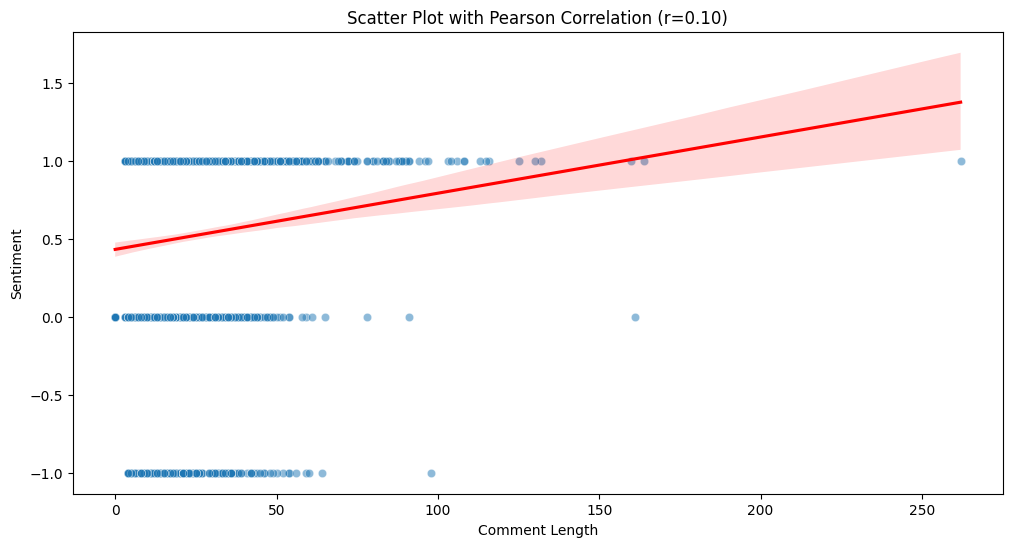

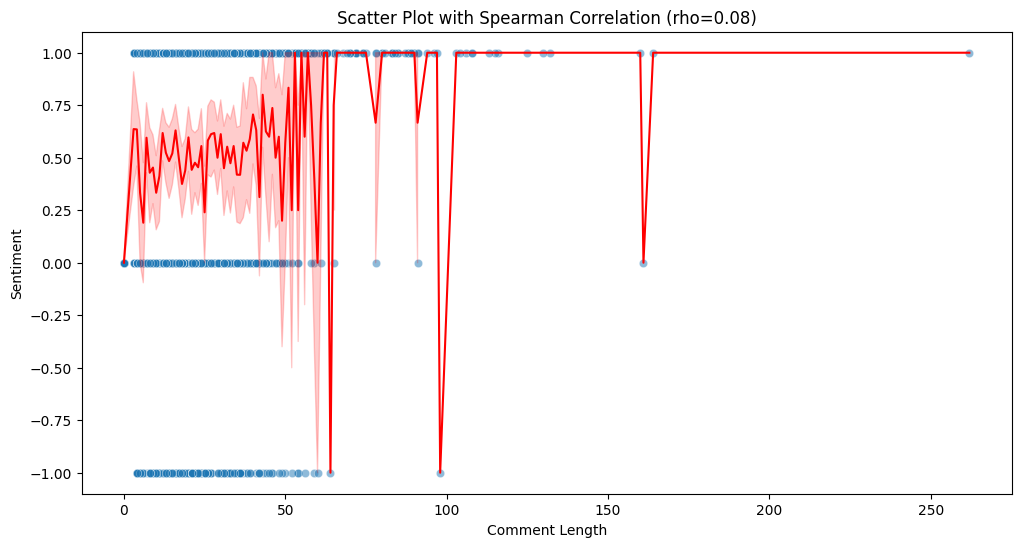

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot with Pearson correlation line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='sentiment', data=df, alpha=0.5)
sns.regplot(x='comment_length', y='sentiment', data=df, scatter=False, color='r')
plt.title(f'Scatter Plot with Pearson Correlation (r={pearson_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()
# Scatter plot with Spearman correlation line (non-parametric)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='sentiment', data=df, alpha=0.5)
sns.lineplot(x='comment_length', y='sentiment',
data=df.sort_values(by='comment_length'), color='r')
plt.title(f'Scatter Plot with Spearman Correlation (rho={spearman_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()